# Processing

In [1]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../../src')

In [2]:
import pandas as pd
import ontime as on

---
## Generation of random time series

In [3]:
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))

---
## Apply function on the whole time series

with Lambda function

In [4]:
add_two = on.processors.mapper(lambda x : x + 2)
new_ts = add_two.process(ts)
new_ts - ts

<TimeSeries (DataArray) (time: 365, component: 1, sample: 1)>
array([[[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

...

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

with normal function

In [5]:
def add_2(x):
    return x + 2

add_two = on.processors.mapper(add_2)
new_ts = add_two.process(ts)
new_ts - ts

<TimeSeries (DataArray) (time: 365, component: 1, sample: 1)>
array([[[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

...

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]],

       [[2.]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

---
## Apply Function on Windows of the Time Series

In [6]:
mean = on.processors.windower({
    'function': 'mean',
    'mode': 'rolling',
    'window': 10
})

In [7]:
new_ts = mean.process(ts)

<Axes: xlabel='time'>

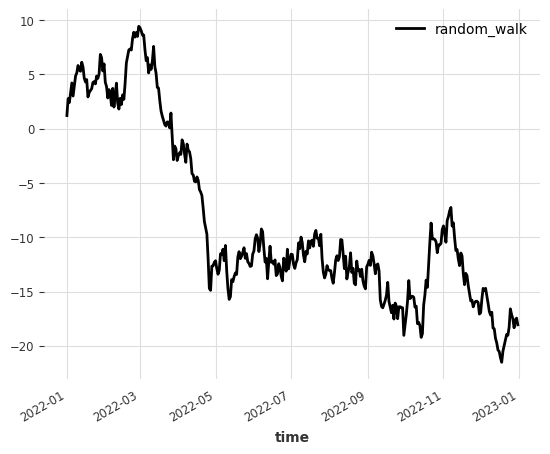

In [8]:
ts.plot()

<Axes: xlabel='time'>

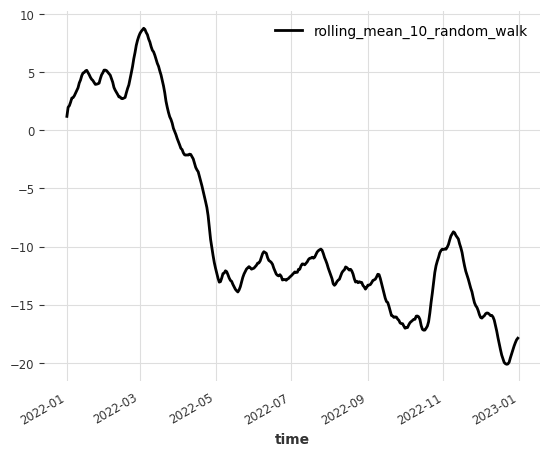

In [9]:
new_ts.plot()

---
## Split Time Series in defined durations of e.g. day, week, month, year

In [10]:
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))

<Axes: xlabel='time'>

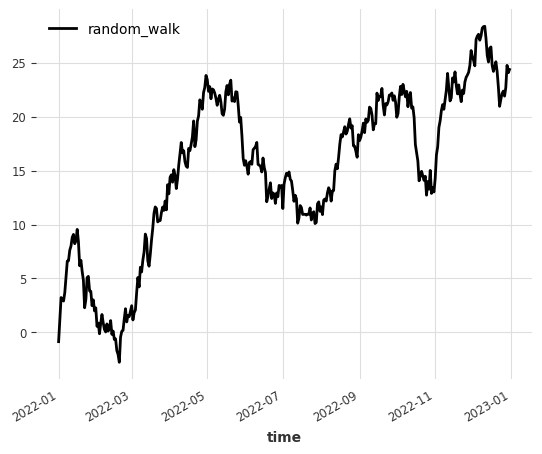

In [11]:
ts.plot()

Split by month

All offset aliases can be used to make different split length (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [12]:
seq = ts.split_by_period('M')

In [13]:
len(seq)

12

Group the splits

In [14]:
ts_g = ts.group_splits(seq)

In [15]:
ts_g

<TimeSeries (DataArray) (time: 365, component: 1, sample: 1)>
array([[[-0.8666846 ]],

       [[ 1.22527526]],

       [[ 3.22922053]],

       [[ 3.0798928 ]],

       [[ 2.90151888]],

       [[ 3.69387479]],

       [[ 5.12006949]],

       [[ 6.60741073]],

       [[ 6.64524743]],

       [[ 7.61443254]],

...

       [[22.75760297]],

       [[20.9647678 ]],

       [[21.61427788]],

       [[22.15040391]],

       [[22.37751034]],

       [[21.91191055]],

       [[22.71147962]],

       [[24.76459945]],

       [[24.08169737]],

       [[24.37988036]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

---
## Compute Correlation Through Time

Load some data from the Energy dataset in Darts

In [16]:
from darts.datasets import EnergyDataset
ts = EnergyDataset().load()

Get a few columns and samples

In [17]:
cols = ['generation biomass', 'generation solar', 'generation nuclear']
ts = ts[cols][0:1000]

Compute correlations within a daily window

In [18]:
correlation = on.processors.correlation('1D')

In [19]:
ts_corr = correlation.process(ts)

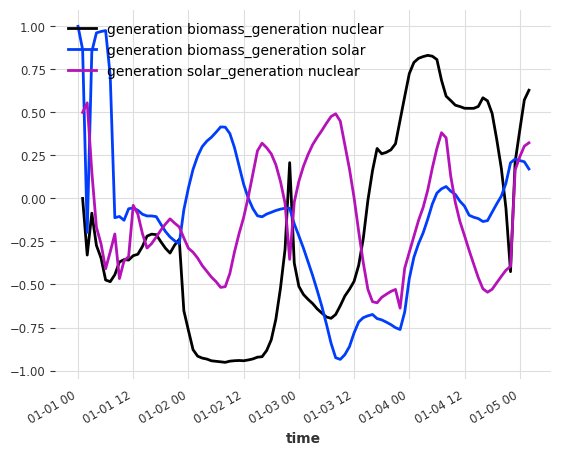

In [20]:
ts_corr[0:100].plot();